# Load and Prepare the Dataset

In [3]:
# Load necessary library
library(ggplot2)

# Load the dataset
app_data <- read.csv("/kaggle/input/app-store-apple-data-set-10k-apps/AppleStore.csv")
head(app_data)

,X,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shopping",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
6,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1


# Question 1: Distribution of App Sizes

Average App Size: 189.9094 MB
Median App Size: 92.65234 MB


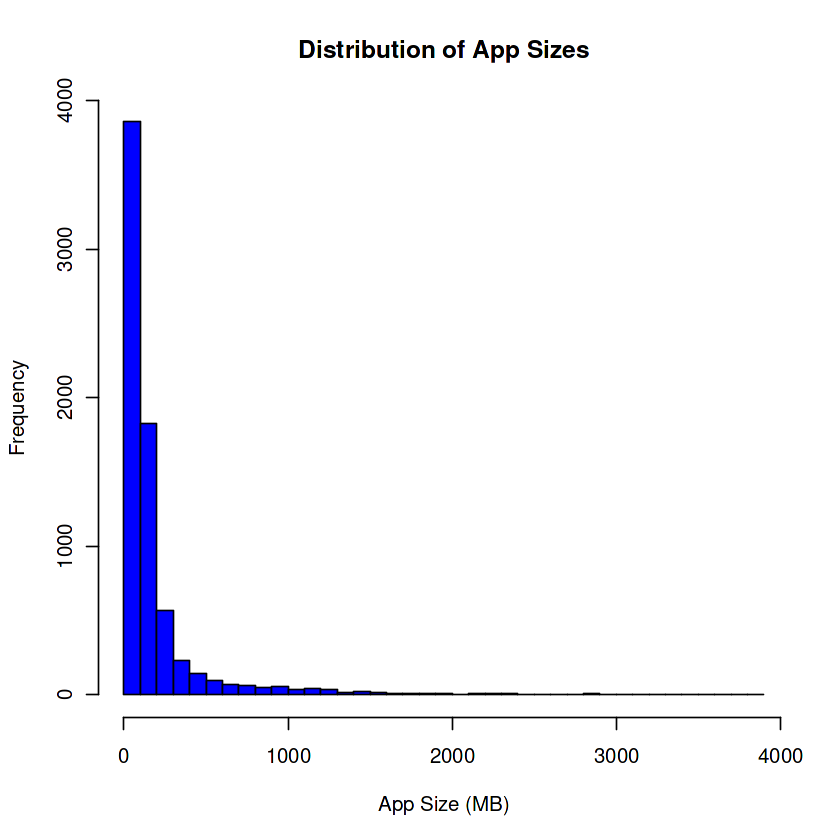

In [4]:
# Convert size_bytes to megabytes
app_data$size_mb <- app_data$size_bytes / (1024 * 1024)

# Calculate average and median app sizes
avg_size <- mean(app_data$size_mb, na.rm = TRUE)
median_size <- median(app_data$size_mb, na.rm = TRUE)

# Print insights
cat("Average App Size:", avg_size, "MB\n")
cat("Median App Size:", median_size, "MB\n")

# Plot histogram
hist(app_data$size_mb, breaks = 30, col = "blue", 
     main = "Distribution of App Sizes",
     xlab = "App Size (MB)", 
     ylab = "Frequency")


# Question 2: Free vs. Paid Apps

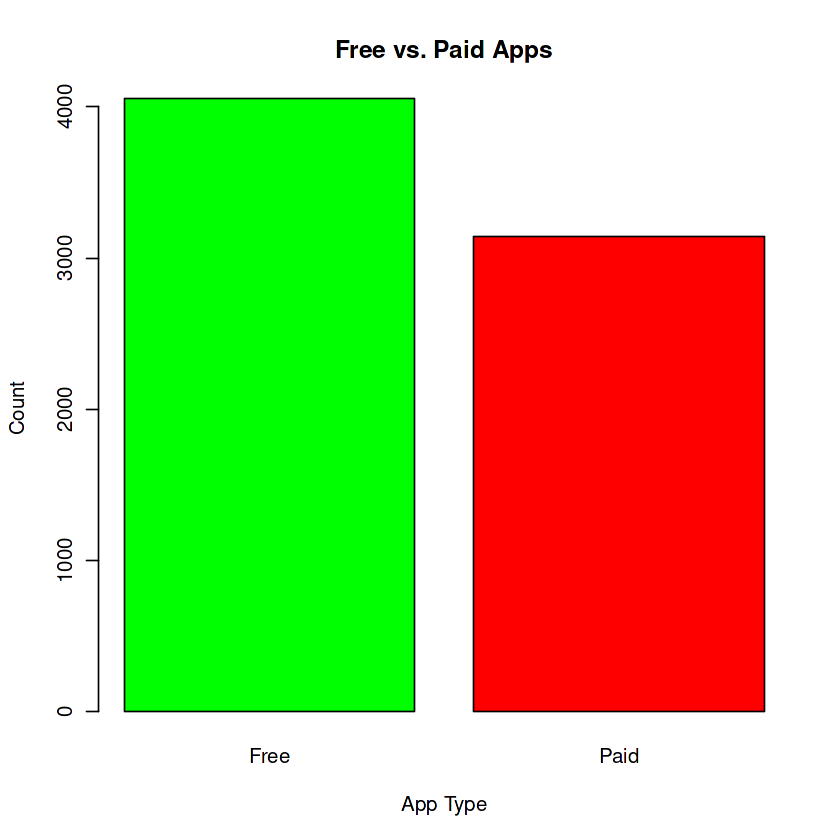

In [5]:
# Classify apps as free or paid
app_data$app_type <- ifelse(app_data$price == 0, "Free", "Paid")

# Count free and paid apps
app_type_count <- table(app_data$app_type)

# Plot bar chart
barplot(app_type_count, col = c("green", "red"),
        main = "Free vs. Paid Apps",
        xlab = "App Type", 
        ylab = "Count")


# Question 3: Popular App Genres

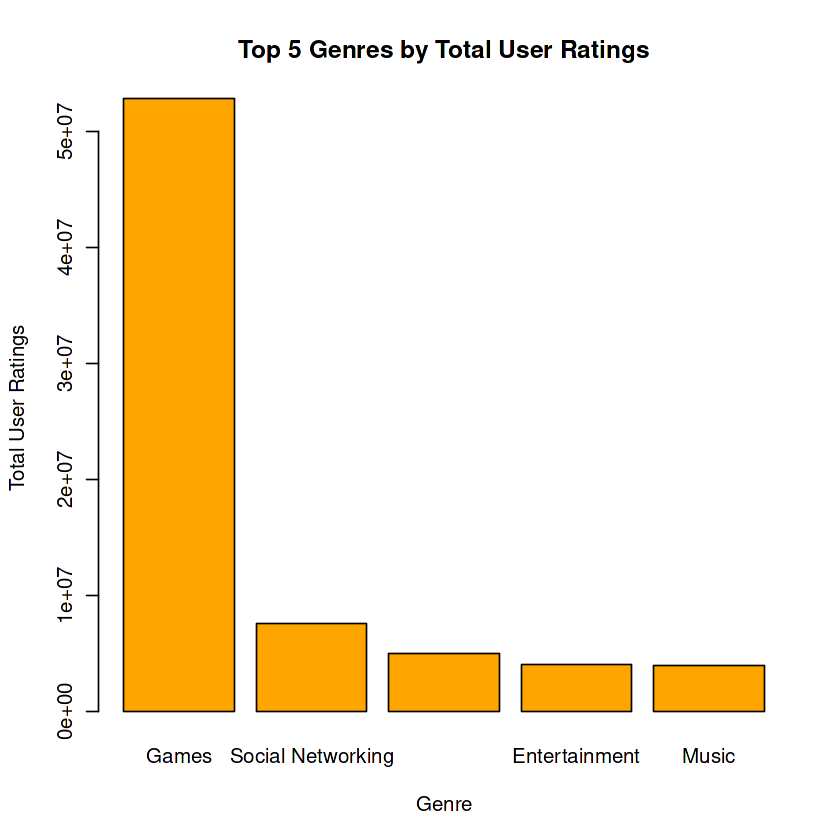

In [6]:
# Group by genre and sum rating_count_tot
genre_popularity <- aggregate(rating_count_tot ~ prime_genre, data = app_data, sum)

# Sort by total user ratings and select top 5 genres
top_genres <- genre_popularity[order(-genre_popularity$rating_count_tot), ][1:5, ]

# Plot bar chart
barplot(top_genres$rating_count_tot, names.arg = top_genres$prime_genre, col = "orange",
        main = "Top 5 Genres by Total User Ratings",
        xlab = "Genre", 
        ylab = "Total User Ratings")


# Question 4: Average User Rating

Average User Rating: 3.526956 


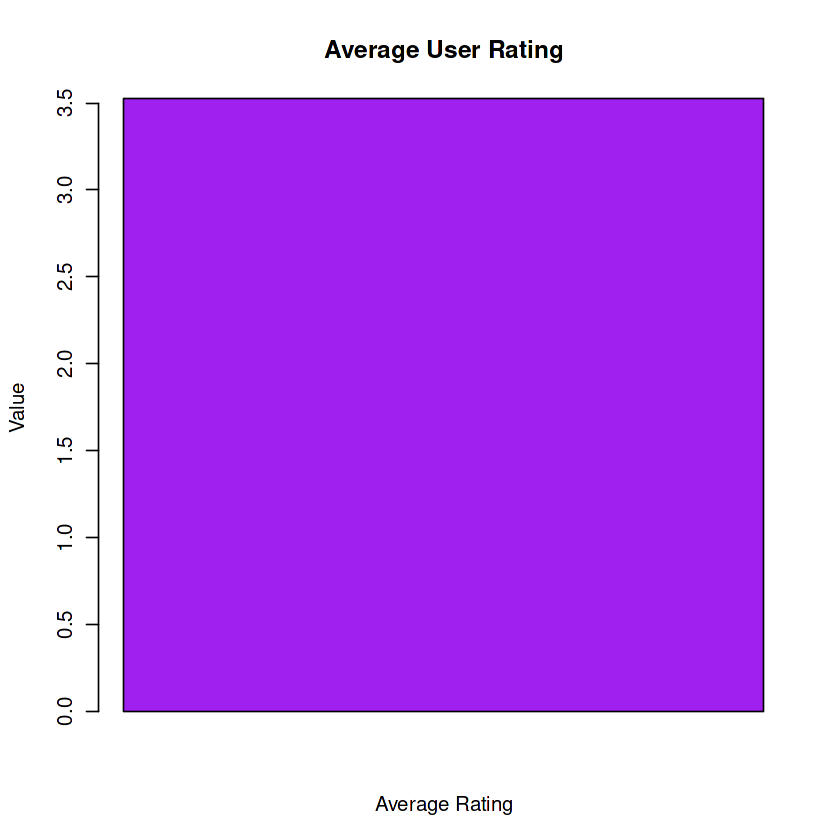

In [7]:
# Calculate average user rating
avg_user_rating <- mean(app_data$user_rating, na.rm = TRUE)

# Print insight
cat("Average User Rating:", avg_user_rating, "\n")

# Plot bar chart
barplot(avg_user_rating, col = "purple", 
        main = "Average User Rating",
        xlab = "Average Rating", 
        ylab = "Value")


# Question 5: Content Rating Distribution

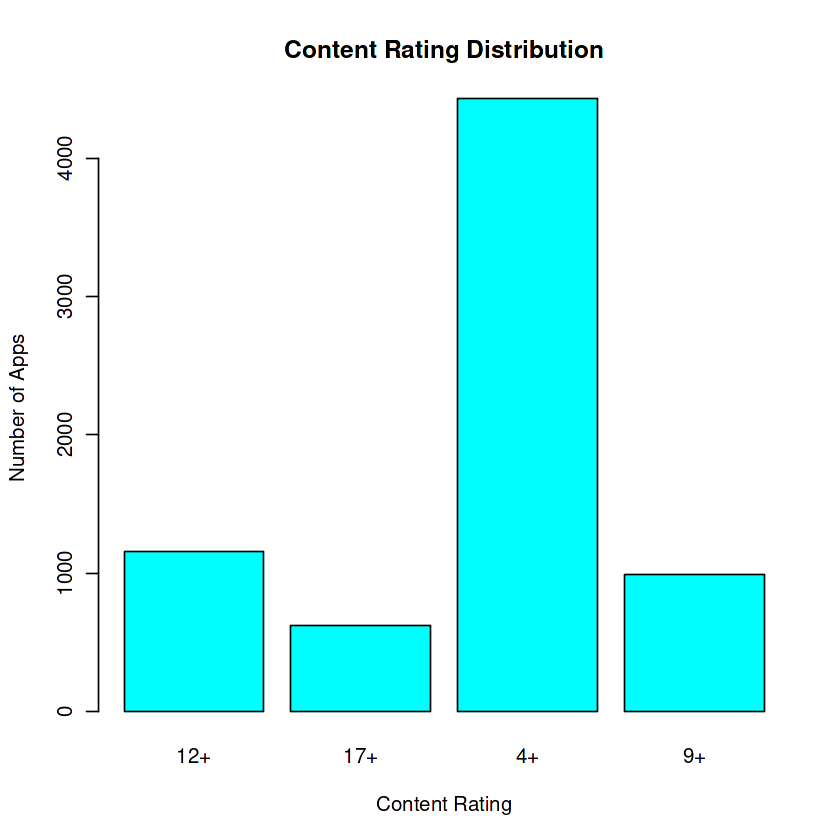

In [8]:
# Count apps for each content rating
content_rating_count <- table(app_data$cont_rating)

# Plot bar chart
barplot(content_rating_count, col = "cyan",
        main = "Content Rating Distribution",
        xlab = "Content Rating", 
        ylab = "Number of Apps")


# Question 6: Percentage of Free vs. Paid Apps

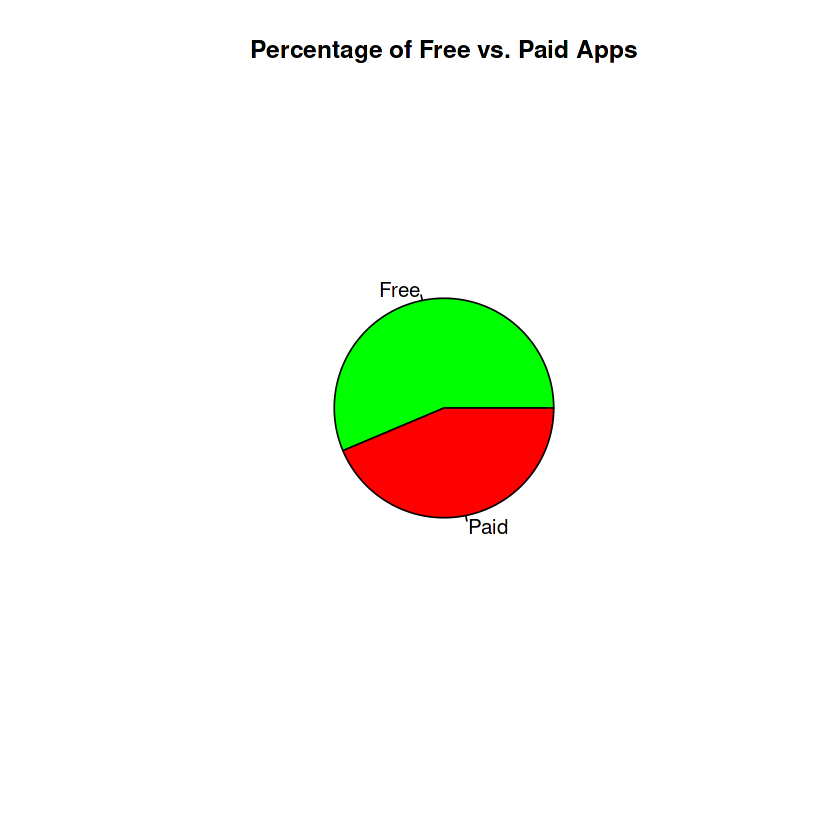

In [9]:
# Calculate percentages
total_apps <- nrow(app_data)
free_percentage <- sum(app_data$price == 0) / total_apps * 100
paid_percentage <- sum(app_data$price > 0) / total_apps * 100

# Data for pie chart
pie_data <- c(free_percentage, paid_percentage)
names(pie_data) <- c("Free", "Paid")

# Plot pie chart
pie(pie_data, col = c("green", "red"),
    main = "Percentage of Free vs. Paid Apps")